# Assignment II
* Leoni Mota Loris

* At first, Load the data.

In [19]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [20]:
from collections import namedtuple

Atom = namedtuple('Atom', ['name', 'element', 'aminoacid', 'x', 'y', 'z', 'h', 'residue_seq_number'])

Atom.parse_name = lambda string: string[12:16].strip()
Atom.parse_element = lambda string: string[12] if len(string.strip()) < 78 \
                     else string[76:78].strip()
Atom.parse_aminoacid = lambda string: string[17:20].strip()
Atom.parse_x = lambda string: float(string[30:38].strip())
Atom.parse_y = lambda string: float(string[38:46].strip())
Atom.parse_z = lambda string: float(string[46:54].strip())
Atom.parse_residue_seq_number = lambda string: int(string[23:30].strip())

Atom.parse = lambda string: Atom(
    Atom.parse_name(string), Atom.parse_element(string), Atom.parse_aminoacid(string),
    Atom.parse_x(string), Atom.parse_y(string), Atom.parse_z(string), 1,Atom.parse_residue_seq_number(string))

In [21]:
def read_molecule(path):
    atoms = []
    with open(path, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                try:
                    atoms.append(Atom.parse(line))
                except Exception as e:
                    print(e)
    return pd.DataFrame(atoms)

In [22]:
crambin = read_molecule('assets/1crn.pdb')
crambin[:10]

,name,element,aminoacid,x,y,z,h,residue_seq_number
0,N,N,THR,17.047,14.099,3.625,1,1
1,CA,C,THR,16.967,12.784,4.338,1,1
2,C,C,THR,15.685,12.755,5.133,1,1
3,O,O,THR,15.268,13.825,5.594,1,1
4,CB,C,THR,18.170,12.703,5.337,1,1
5,OG1,O,THR,19.334,12.829,4.463,1,1
6,CG2,C,THR,18.150,11.546,6.304,1,1
7,N,N,THR,15.115,11.555,5.265,1,2
8,CA,C,THR,13.856,11.469,6.066,1,2
9,C,C,THR,14.164,10.785,7.379,1,2


## Question 1

## a)

* I) First we need to map the sequence of characters as in:

**TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATTCPGDYAN**
to a sequence of amino acids 

* II) And then, infer the position of each atom of the amino acid from a standard reference ($\alpha$ carbon) 


* III) Infer the position of multiple amino acids based on the peptide bond.

#### I) map the sequence of characters

In [23]:
aminoacid_mapping = {'T': 'THR', 'C': 'CYS', 'P': 'PRO', 'S': 'SER', 'I': 'ILE',
                     'V': 'VAL', 'A': 'ALA', 'R': 'ARG', 'N': 'ASN', 'F': 'PHE',
                     'L': 'LEU', 'G': 'GLY', 'E': 'GLU', 'D': 'ASP', 'Y': 'TYR'}
    
def map_to_aminoacids(sequence):
    return list(map(lambda char: aminoacid_mapping[char], sequence))

In [24]:
aminoacid_sequence = 'TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATTCPGDYAN'

In [25]:
aminoacids_names = map_to_aminoacids(aminoacid_sequence)

______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
    

#### II) infer the position of each atom of the amino acid. For this part, it is not well defined on how to infer the positions.


* We could map this sequence to known sequences of the PDB and hope it is a known protein. This is called 
**Homology Modelling** (**SWISS-MODEL** is an example).


* *Or*, we could predict the protein structure using an any number of softwares such as **I-TASSER (Iterative Threading ASSEmbly Refinement)**


We're are going to use both and compare the results.

I-TASSER:
![assets/TASSER.png](assets/TASSER.png)

* But, if we're not using something already pre-defined, we should get the pdb file for each of those amino acids and infer the position of each amino acid by the peptide bond.

*Obs.:* PDB's for each amino acid were downloaded here:
https://www.nyu.edu/pages/mathmol/library/life/life1.html

In [26]:
def load_aminoacids():
    return list(map(lambda aminoacid_name: read_molecule('assets/' + aminoacid_name + '.pdb'), aminoacids_names))

In [27]:
aminoacids = load_aminoacids()

In [28]:
display(aminoacids[0])

,name,element,aminoacid,x,y,z,h,residue_seq_number
0,N,,THR,0.080,-0.083,0.000,1,1
1,CA,,THR,1.539,-0.033,0.000,1,1
2,C,,THR,2.032,1.394,0.000,1,1
3,O,,THR,1.268,2.339,0.000,1,1
4,CB,,THR,2.116,-0.818,-1.226,1,1
5,OG1,,THR,1.743,-2.188,-1.162,1,1
6,CG2,,THR,3.654,-0.842,-1.361,1,1
7,1H,1,THR,-0.523,0.813,0.000,1,1
8,2H,2,THR,-0.461,-1.018,0.000,1,1
9,HA,,THR,1.904,-0.508,0.929,1,1


______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
______________________________________________________________________________________________________________
    

#### III) Infer the position of multiple amino acids based on the peptide bond.


* After the nucleotilic attack the resonance delocalization of electrons in the peptide bond forces the creation of a plane where the atoms will be located (amide plan).

* First, We define how translations and rotations are made.


* Homogeneous coordinates were used throughout this work.
![assets/rotation.png](assets/rotation.png)
![assets/translation.png](assets/translation.png)

In [29]:
import numpy as np

def translation_matrix(delta_x, delta_y, delta_z, ref_x=.0, ref_y=.0, ref_z=.0):
    T = np.eye(4)
    T[0, -1], T[1, -1], T[2, -1] = delta_x - ref_x, delta_y - ref_y, delta_z - ref_z
    return T

def rotation_matrix(x_rotation_rad, y_rotation_rad, z_rotation_rad):
    Rx, Ry, Rz = np.eye(4), np.eye(4), np.eye(4)

    Rx[1, 1], Rx[1, 2], Rx[2, 1], Rx[2, 2] =\
        np.cos(x_rotation_rad), -np.sin(x_rotation_rad), np.sin(x_rotation_rad), np.cos(x_rotation_rad)

    Ry[0, 0], Ry[0, 2], Ry[2, 0], Rx[2, 2] =\
        np.cos(y_rotation_rad), np.sin(y_rotation_rad), -np.sin(y_rotation_rad), np.cos(y_rotation_rad)

    Rz[0, 0], Rx[0, 1], Rx[1, 0], Rx[1, 1] =\
        np.cos(z_rotation_rad), -np.sin(z_rotation_rad), np.sin(z_rotation_rad), np.cos(z_rotation_rad)

    return np.dot(np.dot(Rx, Ry), Rz)

def apply_transformation(transformation, df):
    df[['x', 'y', 'z', 'h']] = transformation.dot(df[['x', 'y', 'z', 'h']].T).T

def apply_rotation(transformation, df, atom_reference='N'):
    position = df[df.name == atom_reference]
    apply_transformation(translation_matrix(-position.x, -position.y, -position.z), df)
    apply_transformation(transformation, df)
    apply_transformation(translation_matrix(position.x, position.y, position.z), df)

* Some utility functions for calculating the euclidean distance and the angle between two vectors:


$$distance = \sqrt{|(A - B)|}$$


$$cos(\alpha) = \frac{A \cdot B}{|A||B|}$$ 

In [582]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def l2_norm(p):
    return np.sqrt(np.sum(p ** 2))

def get_angle_rad(a, b, normal_reference):
    negative = np.all(np.dot(np.cross(a, b), normal_reference) < 0)
    angle = np.arccos(((a).dot(b))/(l2_norm(a) * l2_norm(b))) 
    angle = angle if not np.isnan(angle) else .0
    return angle if not negative else -angle

* We will consider the omega torsion angle of `Proline` to be close to zero degrees for the `cis` configuration, and, most often and 180 degrees for the trans configuration.


![assets/rotation.png](assets/ct.png)

In [448]:
def get_desired_omega(current_aminoacid):
    return 0 if 'PRO' in current_aminoacid.aminoacid.values else 180

def get_desired_OCN_angle(current_aminoacid):
    return 123 if 'PRO' in current_aminoacid.aminoacid.values else 123.5

def get_desired_CNCa_angle(current_aminoacid):
    return 126 if 'PRO' in current_aminoacid.aminoacid.values else 122

def get_desired_bond_length(current_aminoacid):
    return 1.32 if 'PRO' in current_aminoacid.aminoacid.values else 1.33

________________________________
* This function infers the position at which the amide nitrogen should be, so we can find a translation of the "next" aminoacid.


* It return a position that is equals to the rotation of the oxygen inside the plane C$\alpha$-C-N, and uses the length of the peptide bond (1.33Å or 1.32Å) and the Angle (123.5 or 123).

In [473]:
def get_desired_nitrogen_location(aminoacid):
    alpha_carbon = aminoacid[aminoacid.name == 'CA'][['x', 'y', 'z']].values.reshape(-1,)
    carboxyl_carbon = aminoacid[aminoacid.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
    oxygen_double_bonded = aminoacid[aminoacid.name == 'O'][['x', 'y', 'z']].values.reshape(-1,)

    CO = oxygen_double_bonded - carboxyl_carbon
    CA = alpha_carbon - carboxyl_carbon

    plane_normal = np.cross(CO, CA)
    plane_vector_basis = np.array([
        np.cross(CO, plane_normal) / l2_norm(np.cross(CO, plane_normal)), 
        CO / l2_norm(CO), 
        plane_normal / l2_norm(plane_normal)]).T

    CO_new_norm = CO * get_desired_bond_length(aminoacid) / l2_norm(CO)
    CO_new_norm_plane = np.linalg.solve(plane_vector_basis, CO_new_norm)[:2]
    
    rotation_angle = np.radians(get_desired_OCN_angle(aminoacid))
    rotation_angle_matrix = np.array(
        [[np.cos(rotation_angle), -np.sin(rotation_angle)], 
         [np.sin(rotation_angle), np.cos(rotation_angle)]])

    CN_plane = CO_new_norm_plane @ rotation_angle_matrix
    CN = np.linalg.solve(np.linalg.inv(plane_vector_basis), np.array([CN_plane[0], CN_plane[1], 0]))
    return CN + carboxyl_carbon

In [474]:
def get_normal_from_amide_plan(previous_aminoacid, current_aminoacid, terminal='C'):
    if terminal == 'C':
        alpha_carbon = previous_aminoacid[previous_aminoacid.name == 'CA'][['x', 'y', 'z']].values.reshape(-1,)
        carboxyl_carbon = previous_aminoacid[previous_aminoacid.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
        oxygen_double_bonded = previous_aminoacid[previous_aminoacid.name == 'O'][['x', 'y', 'z']].values.reshape(-1,)
        C1 = oxygen_double_bonded - carboxyl_carbon
        C2 = alpha_carbon - carboxyl_carbon
    if terminal == 'N':
        last_carbon = current_aminoacid[current_aminoacid.name == 'CA'][['x', 'y', 'z']].values.reshape(-1,)
        nitrogen_amide = current_aminoacid[current_aminoacid.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
        carboxyl_carbon = previous_aminoacid[previous_aminoacid.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
        C2 = last_carbon - nitrogen_amide
        C1 = carboxyl_carbon - nitrogen_amide
    return np.cross(C1, C2)

In [583]:
def translate_for_peptide_bond(previous_aminoacid, current_aminoacid):
    desired_nitrogen_location = get_desired_nitrogen_location(previous_aminoacid)
    current_nitrogen_location = current_aminoacid[current_aminoacid.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
        
    required_tranlation = desired_nitrogen_location - current_nitrogen_location
    
    required_tranlation_matrix = translation_matrix(required_tranlation[0], required_tranlation[1], required_tranlation[2])
    apply_transformation(required_tranlation_matrix, current_aminoacid)
    
def rotate_for_peptide_bond(previous_aminoacid, current_aminoacid):
    omega = get_desired_omega(current_aminoacid)
    previous_normal = get_normal_from_amide_plan(previous_aminoacid, current_aminoacid, terminal='C')
    
    current_normal = get_normal_from_amide_plan(previous_aminoacid, current_aminoacid, terminal='N')
    rotation_angle_x = get_angle_rad(current_normal[[1, 2]], previous_normal[[1, 2]], 
                                     -previous_normal[[1, 2]])
    apply_rotation(rotation_matrix(rotation_angle_x, 0, 0), current_aminoacid)
    
    current_normal = get_normal_from_amide_plan(previous_aminoacid, current_aminoacid, terminal='N')
    rotation_angle_y = get_angle_rad(current_normal[[0, 2]], previous_normal[[0, 2]], 
                                     -previous_normal[[0, 2]])
    apply_rotation(rotation_matrix(0, rotation_angle_y, 0), current_aminoacid)
    
    current_normal = get_normal_from_amide_plan(previous_aminoacid, current_aminoacid, terminal='N')
    rotation_angle_z = get_angle_rad(current_normal[[0, 1]], previous_normal[[0, 1]],
                                     -previous_normal[[0, 1]])
    apply_rotation(rotation_matrix(0, 0, rotation_angle_z), current_aminoacid)

def rotate_for_CNCa_angle(previous_aminoacid, current_aminoacid):
    carboxyl_carbon = previous_aminoacid[previous_aminoacid.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
    nitrogen_amide = current_aminoacid[current_aminoacid.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
    alpha_carbon = current_aminoacid[current_aminoacid.name == 'CA'][['x', 'y', 'z']].values.reshape(-1,)

    NC = carboxyl_carbon - nitrogen_amide
    NCa = alpha_carbon - nitrogen_amide

    plane_normal = np.cross(NCa, NC)
    plane_vector_basis = np.array([
        np.cross(NC, plane_normal) / l2_norm(np.cross(NC, plane_normal)), 
        NC / l2_norm(NC),
        plane_normal / l2_norm(plane_normal)]).T

    current_CNCa_angle_rad = get_angle_rad(NC, NCa, -plane_normal)
    desired_CNCa_angle_rad = np.radians(get_desired_CNCa_angle(current_aminoacid))
    
    needed_rotation_rad = desired_CNCa_angle_rad - current_CNCa_angle_rad
    print('needed_rotation', np.degrees(needed_rotation_rad))
    
    new_current_aminoacid = current_aminoacid.copy()
    for i, atom in new_current_aminoacid.iterrows():
        new_current_aminoacid.loc[i, ['x', 'y', 'z']] =\
            np.linalg.solve(plane_vector_basis, np.array(atom.loc[['x', 'y', 'z']].values.reshape(-1,), dtype='float'))
    
    apply_rotation(rotation_matrix(0, 0, needed_rotation_rad), new_current_aminoacid)

    for i, atom in new_current_aminoacid.iterrows():
        new_current_aminoacid.loc[i, ['x', 'y', 'z']] =\
            np.linalg.solve(np.linalg.inv(plane_vector_basis), np.array(atom.loc[['x', 'y', 'z']].values.reshape(-1,), dtype='float'))
    
    new_alpha_carbon = new_current_aminoacid[new_current_aminoacid.name == 'CA'][['x', 'y', 'z']].values.reshape(-1,)
    NC = carboxyl_carbon - nitrogen_amide
    NCa = new_alpha_carbon - nitrogen_amide
    print('NCa', NCa)
    print(np.degrees(get_angle_rad(NC, NCa, -plane_normal)))
#     CN = np.linalg.solve(np.linalg.inv(plane_vector_basis), np.array([CN_plane[0], CN_plane[1], 0]))
#     return CN + carboxyl_carbon

In [581]:
def dehydration(aminoacid1, aminoacid2):
    aminoacid1 = aminoacid1[~aminoacid1.name.isin(['OC', 'HC'])]    

__________________________
* Functions to verify the constrains regarding angles and distances in the amide plane.

In [ ]:
def check_peptide_bond_length(previous_aminoacid, current_aminoacid):
    a = previous_aminoacid[previous_aminoacid.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
    b = current_aminoacid[current_aminoacid.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
    print('euclidean_distance for the peptide bond between %s and %s: %.2f' % 
          (previous_aminoacid.aminoacid[0], current_aminoacid.aminoacid[0], euclidean_distance(a, b)))
    
def check_OCN_angle(previous_aminoacid, current_aminoacid):
    c = previous_aminoacid[previous_aminoacid.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
    n = current_aminoacid[current_aminoacid.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
    o = previous_aminoacid[previous_aminoacid.name == 'O'][['x', 'y', 'z']].values.reshape(-1,)
    print('O-C-N Angle for the peptide bond between %s and %s:        %.2f' % 
          (previous_aminoacid.aminoacid[0], current_aminoacid.aminoacid[0], abs(180*get_angle_rad(o-c, n-c, (o-c))/np.pi)))

* The actual translations and rotations happens below:
    * We first translate the "next" aminoacid and then we do the rotations so the angles and distances can be as depicted below:
   
![assets/rotation.png](assets/pep.png)

In [599]:
aminoacids_df = load_aminoacids()
for i in range(1, len(aminoacids_df)):
    current_aminoacid = aminoacids_df[i]
    previous_aminoacid = aminoacids_df[i - 1]
    
    dehydration(previous_aminoacid, current_aminoacid)
    translate_for_peptide_bond(previous_aminoacid, current_aminoacid)
    rotate_for_peptide_bond(previous_aminoacid, current_aminoacid)
    rotate_for_CNCa_angle(previous_aminoacid, current_aminoacid)
    
    # check_peptide_bond_length(previous_aminoacid, current_aminoacid)
    # check_OCN_angle(previous_aminoacid, current_aminoacid)

print('last aminoacid:')
display(current_aminoacid)

c:\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


NCa [ 0.271 -2.372  0.   ]
needed_rotation 70.89484381311769
NCa [-0.75771099 -1.95440275  0.        ]
23.396365497856767
euclidean_distance for the peptide bond between THR and THR: 1.33
O-C-N Angle for the peptide bond between THR and THR:        123.50
NCa [ 0.393 -2.377  0.   ]
needed_rotation 70.24844712336981
NCa [-0.67824914 -1.98937919  0.        ]
23.537470128605243
euclidean_distance for the peptide bond between THR and CYS: 1.33
O-C-N Angle for the peptide bond between THR and CYS:        123.50
NCa [ 0.393 -2.377  0.   ]
needed_rotation 70.9539567695964
NCa [-0.69562587 -2.00467564  0.        ]
22.521142529575304
euclidean_distance for the peptide bond between CYS and CYS: 1.33
O-C-N Angle for the peptide bond between CYS and CYS:        123.50
NCa [ 0.20119612 -2.45571957  0.76193793]
needed_rotation 78.27389356391811
NCa [-0.89058777 -2.09183837  0.76193793]
21.317163583109995
euclidean_distance for the peptide bond between CYS and PRO: 1.33
O-C-N Angle for the peptide bo

NCa [ 0.19715986 -2.4282526   0.72766579]
-34.98333251851884
euclidean_distance for the peptide bond between ILE and ILE: 1.33
O-C-N Angle for the peptide bond between ILE and ILE:        123.50
NCa [ 0.44176759 -2.37188529  0.17607086]
needed_rotation 80.8285354015082
NCa [-0.90386484 -2.25569456  0.17607086]
11.337851929385849
euclidean_distance for the peptide bond between ILE and ILE: 1.33
O-C-N Angle for the peptide bond between ILE and ILE:        123.50
NCa [-0.33750704 -1.89946756  1.4155066 ]
needed_rotation 80.8538725417639
NCa [-1.08068173 -1.27477117  1.4155066 ]
22.969845227547435
euclidean_distance for the peptide bond between ILE and PRO: 1.33
O-C-N Angle for the peptide bond between ILE and PRO:        123.50
NCa [ 0.19985805  2.03833716 -2.0139528 ]
needed_rotation 79.49577958000829
NCa [-0.41579662  2.71635661 -2.0139528 ]
29.841917893309294
euclidean_distance for the peptide bond between PRO and GLY: 1.32
O-C-N Angle for the peptide bond between PRO and GLY:        1

,name,element,aminoacid,x,y,z,h,residue_seq_number
0,N,,ASN,21.596354,14.948196,-7.701691,1.0,1
1,CA,,ASN,21.388192,14.833382,-7.833907,1.0,1
2,C,,ASN,19.911009,14.912137,-9.247973,1.0,1
3,O,,ASN,19.041622,15.054867,-10.131538,1.0,1
4,CB,,ASN,20.902537,14.828958,-5.881166,1.0,1
5,CG,,ASN,22.271507,14.753246,-4.289677,1.0,1
6,OD1,,ASN,21.986287,14.860724,-3.140273,1.0,1
7,ND2,,ASN,23.808440,14.567608,-4.178466,1.0,1
8,1H,1,ASN,20.769576,15.072002,-8.535599,1.0,1
9,2H,2,ASN,22.586966,14.914417,-6.763543,1.0,1


* We have all the atoms aligned accordingly. So, let's create string rows for the pdb.

In [585]:
def write_atom_to_file(atom_row, aminoacid_seq_number, fd):
    global atom_seq_number
    atom_seq_number += 1
    if 'H' not in atom_row[0]:
        atom_row.element = ''.join(filter(str.isalpha, atom_row[0]))[0]
        template_row =\
        'ATOM    '+\
        ('%d'%atom_seq_number).rjust(3)+\
        '  '+\
        ('%s'%atom_row[0]).rjust(3)+\
        ' '+\
        ('%s'%atom_row.aminoacid).rjust(3)+\
        ' A'+\
        ('%d'%aminoacid_seq_number).rjust(4)+\
        '    '+\
        ('%.3f'%atom_row.x).rjust(8)+\
        ('%.3f'%atom_row.y).rjust(8)+\
        ('%.3f'%atom_row.x).rjust(8)+\
        '  1.00  5.99           '+\
        ('%s\n'%atom_row.element)
        f.write(template_row)

In [589]:
atom_seq_number = 0

with open('assets/final_inferred_molecule.pdb', 'w') as f:
    for idx, aminoacid in enumerate(aminoacids_df):
        for atom_row in aminoacid.iterrows():
            write_atom_to_file(atom_row[1], idx, f)

with open("assets/final_inferred_molecule.pdb") as f:
    head = [next(f) for x in range(5)]
print('\n'.join(head))
print('...')

ATOM      1    N THR A   0       0.080  -0.083   0.080  1.00  5.99           N

ATOM      2   CA THR A   0       1.539  -0.033   1.539  1.00  5.99           C

ATOM      3    C THR A   0       2.032   1.394   2.032  1.00  5.99           C

ATOM      4    O THR A   0       1.268   2.339   1.268  1.00  5.99           O

ATOM      5   CB THR A   0       2.116  -0.818   2.116  1.00  5.99           C

...


_________________________________________________________________________________
_________________________________________________________________________________
_________________________________________________________________________________
_________________________________________________________________________________
_________________________________________________________________________________
_________________________________________________________________________________
_________________________________________________________________________________
_________________________________________________________________________________


## b) Receive PDB file and list $\phi$ and $\psi$

$$ ψ  = Angle( Normal(N_{i}, C_{\alpha i}, C_{i}); Normal(C_{\alpha i}, C_{i}, N_{i+1}) ) $$

$$φ = Angle( Normal(C_{i-1}, N_{i}, C_{\alpha i}); Normal(N_{i}, C_{\alpha i}, C_{i}) )$$

![assets/phi_psi.png](assets/phi_psi.png)

In [590]:
def compute_psi(ni, cai, ci, ni1):
    normal_cai = np.cross((ni - cai), (ci - cai))
    normal_ci = np.cross((cai - ci), (ni1 - ci))
    return np.degrees(get_angle_rad(normal_cai, normal_ci, (ci-cai)))

def compute_phi(ci_prev, ni, cai, ci):
    normal_ni = np.cross((ci_prev - ni), (cai - ni))
    normal_cai = np.cross((ni - cai), (ci - cai))
    return np.degrees(get_angle_rad(normal_ni, normal_cai, -(ni-cai)))

In [591]:
def get_phy_psi(molecule):
    molecule['phi'] = None
    molecule['psi'] = None

    data = []

    for i in range(1, len(molecule.residue_seq_number.unique())):
        aminoacid_i = molecule[molecule.residue_seq_number == (i)]
        ni = aminoacid_i[aminoacid_i.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
        cai = aminoacid_i[aminoacid_i.name == 'CA'][['x', 'y', 'z']].values.reshape(-1,)
        ci = aminoacid_i[aminoacid_i.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
        angle_data = {'residue_name': aminoacid_i.aminoacid.values[0], 'phi': None, 'psi': None}
        try:
            aminoacid_prev = molecule[molecule.residue_seq_number == (i-1)]
            ci_prev = aminoacid_prev[aminoacid_prev.name == 'C'][['x', 'y', 'z']].values.reshape(-1,)
            angle_data['phi'] = compute_phi(ci_prev, ni, cai, ci)
        except: pass

        try:
            aminoacid_i1 = molecule[molecule.residue_seq_number == (i+1)]
            ni1 = aminoacid_i1[aminoacid_i1.name == 'N'][['x', 'y', 'z']].values.reshape(-1,)
            angle_data['psi'] = compute_psi(ni, cai, ci, ni1)
        except: pass

        data.append(angle_data)
    return data

In [592]:
molecule = read_molecule('assets/final_inferred_molecule.pdb')
phi_psi = pd.DataFrame(get_phy_psi(molecule))
phi_psi[:10]

c:\python36\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


,phi,psi,residue_name
0,179.999999,180.000000,THR
1,179.999999,179.999999,CYS
2,0.000000,0.000000,CYS
3,180.000000,180.000000,PRO
4,0.000000,180.000000,SER
5,180.000000,179.999999,ILE
6,180.000000,180.000000,VAL
7,179.999999,180.000000,ALA
8,0.000000,179.999999,ARG
9,180.000000,0.000000,SER


## c) Ramachandran 

In [593]:
molecule = read_molecule('assets/1crn.pdb')
phi_psi = pd.DataFrame(get_phy_psi(molecule))
phi_psi[:10]

,phi,psi,residue_name
0,NaN,147.660026,THR
1,-107.832573,144.346241,THR
2,-131.170389,133.291143,CYS
3,-118.896523,151.202717,CYS
4,-76.181506,-18.979386,PRO
5,-157.924288,166.027161,SER
6,-63.579524,-42.100632,ILE
7,-55.930329,-44.561332,VAL
8,-61.364845,-43.779138,ALA
9,-63.193412,-43.303486,ARG


In [594]:
phi_psi = phi_psi.fillna(0)

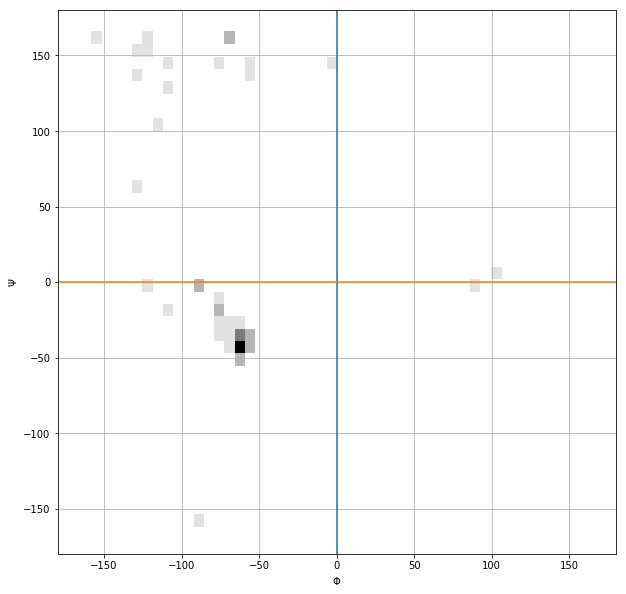

In [595]:
plt.figure(figsize=(10, 10))

plt.hist2d(phi_psi.phi, phi_psi.psi, bins=(40, 40), cmap=plt.cm.Greys);
plt.plot(np.zeros_like(phi_psi.phi), np.linspace(-180, 180, len(phi_psi.phi)))
plt.plot(np.linspace(-180, 180, len(phi_psi.phi)), np.zeros_like(phi_psi.phi))
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.grid()
plt.show()

__________________
__________________
__________________
__________________
__________________



## d) Secondary structure:

*When five or more consecutive amino acids have torsion angles in the $\alpha$-helical region of the Ramachandran plot, the
hydrogen bonds typical of the $\alpha$-helix will form and the structure will snap into a very highly populated and finely
focused area near '$\phi$ = 63.8°, $\psi$ = 41.1° (..) as 39% of all 237 384 amino acids were found here, in an area
just 2% of the Ramachandran plot -89° < $\phi$ < -39°, -66° < $\psi$ < -16°*
___________________________
(...)


*The conformations of the amino acids in five of the six groups were surprisingly similar with respect to both the average and values (all within -130° < $\phi$ < -105° and 128° < $\psi$ < 147°) for the first five groups and the standard deviations (15...26°).*
___________________________

    - Source: HOVMOLLER S1, ZHOU T, OHLSON T. Conformations of amino acids in proteins. Acta Crystallogr D Biol Crystallogr

In [596]:
alpha_helix_phi = (-89, -39)
alpha_helix_psi = (-66, -16)
beta_sheet_phi = (-130, -105)
beta_sheet_psi = (128, 147)
N_AMINOACIDS = 5

In [597]:
secondary_structure = []
for i, row in phi_psi.iterrows():
    if alpha_helix_phi[0] < row.loc['phi'] < alpha_helix_phi[1] and\
       alpha_helix_psi[0] < row.loc['psi'] < alpha_helix_psi[1]:
        secondary_structure.append('H')
    elif beta_sheet_phi[0] < row.loc['phi'] < beta_sheet_phi[1] and\
         beta_sheet_psi[0] < row.loc['psi'] < beta_sheet_psi[1]:
        secondary_structure.append('B')
    else:
        secondary_structure.append('-')

In [598]:
print('Primary Structure:')
print('TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN\n')
print('Secondary Structure:')
print(''.join(secondary_structure))


Primary Structure:
TTCCPSIVARSNFNVCRLPGTPEAICATYTGCIIIPGATCPGDYAN

Secondary Structure:
-B--H-HHHHHHHHHHHH----HHHHHHH----B-H-----H---
